In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
import keras.backend as kb

Using TensorFlow backend.


In [2]:
from fonction import *

In [3]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_square_B\\data_set_B_3_180.csv'

In [4]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(84432, 41)

In [5]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [6]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (67545, 40)
 the size of X_test is  (16887, 40)
 the size of Y_train is  (67545, 1)
 the size of Y_test is  (16887, 1)


In [7]:
def costum_loss(y_actual,y_pred):
    pi = np.pi
    check = kb.sign(pi/2-y_pred)*pi
    val_1 = kb.square(y_actual-y_pred)
    val_2 = kb.square(y_actual-(y_pred+check))
    tot = kb.minimum(val_1,val_2)
    return kb.mean(tot)

In [8]:
def build_model_3_tanh(summary = False):
    
    #architecture
    model = Sequential()
    
    model.add(Dense(40 ,input_shape=(40,)))        
    model.add(Activation('tanh'))
              
    model.add(Dense(40))        
    model.add(Activation('tanh'))
              
    model.add(Dense(40))      
    model.add(Activation('tanh'))
    model.add(Dense(1))
              
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss=costum_loss,optimizer='adam')
    return model

===================NN architecture==========================
=======================training=============================
Epoch 00693: early stopping
0.008076047407318461
27
========================Summary=============================
all value are in degree 
 the error mean is :  3.6853567986458438
 the error std is :  3.5958649671327922
 the accuracy up to 0.1  degree is :  2.054835080239237  %
 the accuracy up to 1    degree is :  19.535737549594362  %
 the accuracy up to 5    degree is :  74.62545153076331  %
 the accuracy up to 10    degree is :  94.30923195357376  %
MSE Train: 0.007 | MSE Test: 0.008 | MSE modifie Test: 0.008


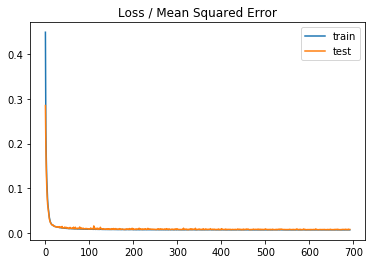

Training time is : 1.09  minute
======================Saving model==========================
Saved model to disk


In [9]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"test.h5",batch = 1000)

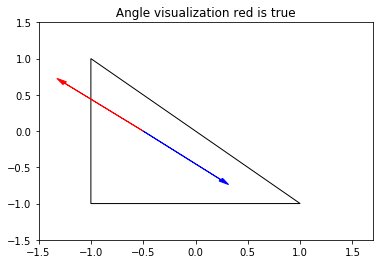

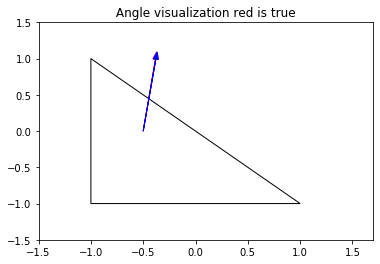

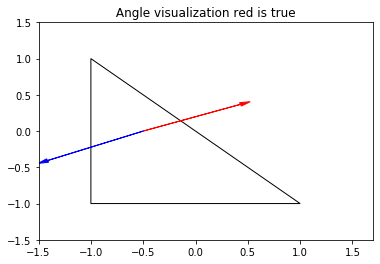

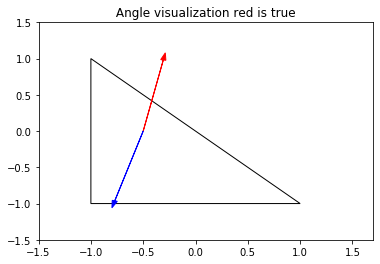

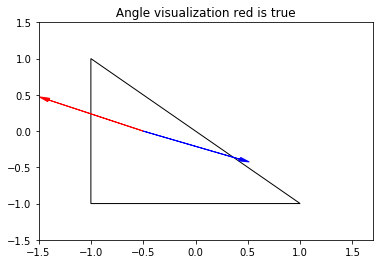

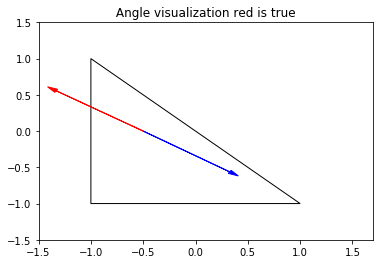

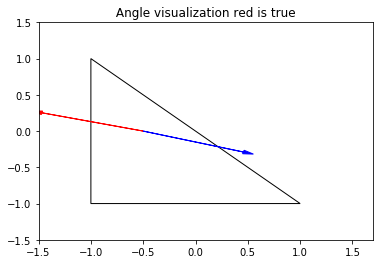

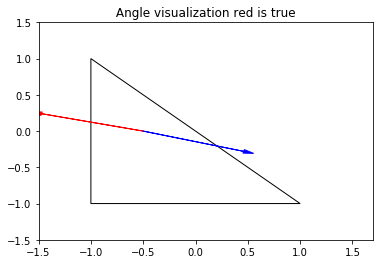

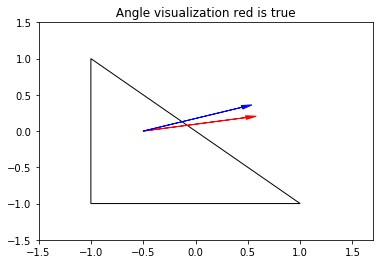

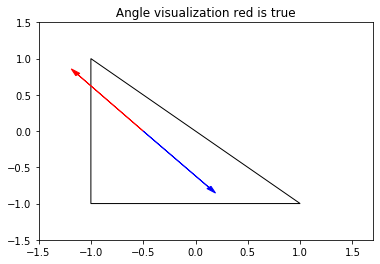

In [10]:
angle_visualization(model_3_tanh , X_test , Y_test)

### Analyse of the problem


In [24]:
Y_hat =  model_3_tanh.predict(X_test, verbose=0)

In [26]:
y_pred_new = np.copy(Y_hat)
for ind_y,y_p in enumerate(Y_hat):
    if y_p < np.pi/2 :
        if np.abs(y_p-Y_test[ind_y]) > np.abs(Y_test[ind_y] -(y_p+np.pi)):
            y_pred_new[ind_y]= y_p + np.pi
    else:
        if np.abs(y_p-Y_test[ind_y]) > np.abs(Y_test[ind_y] -(y_p-np.pi)):
            y_pred_new[ind_y]= y_p - np.pi

In [27]:
error = y_pred_new-Y_test

In [28]:
print(error)

[[-0.02610525]
 [ 0.09321559]
 [-0.04585549]
 ...
 [ 0.18668272]
 [-0.0321993 ]
 [ 0.00151442]]


In [29]:
indice = np.where(np.abs(error) >=1)[0]
print(indice.shape[0])

3


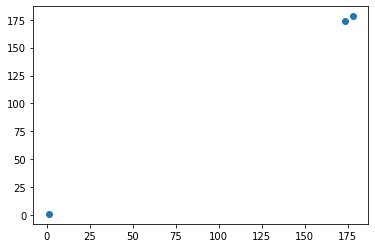

In [30]:
plt.scatter(Y_test[indice]*180/np.pi,Y_test[indice]*180/np.pi)

we can see that the model strugle with the angle in the reference element that is near zero or near pi 

the location of the discontinuity is really often in the top of the triangle. their is only horizontal discontinuity


In [16]:
data_path_test_1 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_30.csv'

In [17]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the loss is : 0.0063
on a new mesh the modifie mse is : 0.0063
saving prediction ...
saving succed


In [18]:
data_path_test_2 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_60.csv'

loading data ... 
loading succed
on a new mesh the loss is : 0.0008
on a new mesh the modifie mse is : 0.0008


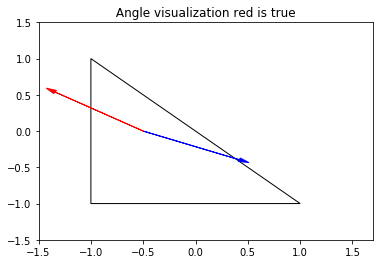

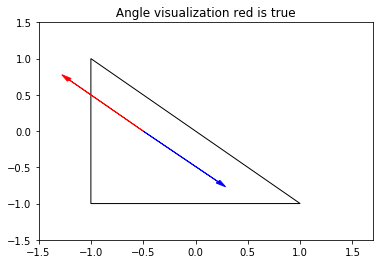

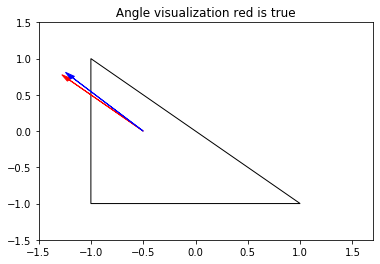

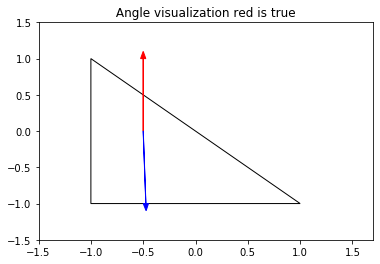

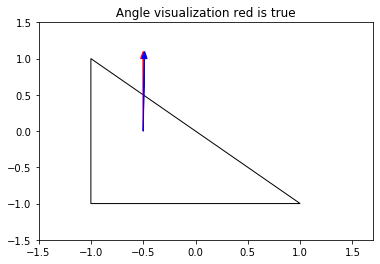

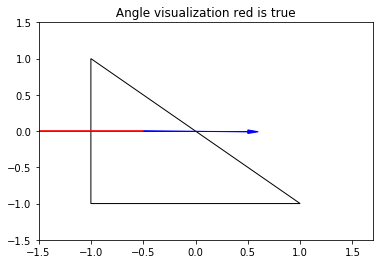

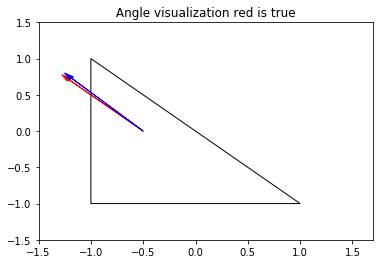

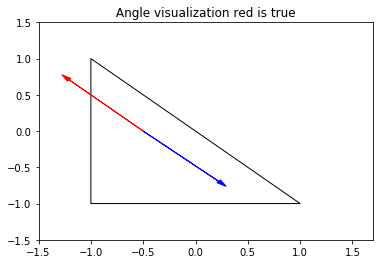

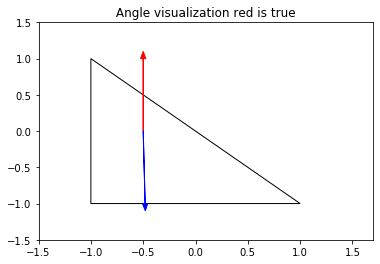

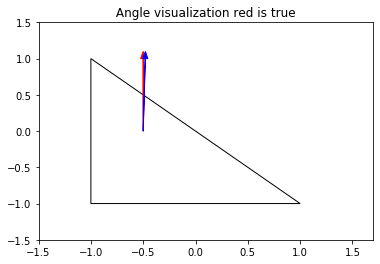

saving prediction ...
saving succed


In [19]:
test_mse  = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60.csv',model_3_tanh,vizu = True ,normalized=True)

In [20]:
data_path_test_3 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_90.csv'

In [21]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the loss is : 0.0020
on a new mesh the modifie mse is : 0.0020
saving prediction ...
saving succed


In [22]:
data_path_test_4 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_circle.csv'

In [23]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the loss is : nan
on a new mesh the modifie mse is : nan
saving prediction ...
saving succed


#### trying to predict with model C

In [30]:
from keras.models import load_model
model_C = load_model('model_3_tanh_data_C_3.h5')

In [31]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0095
saving prediction ...
saving succed


In [32]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.7507
saving prediction ...
saving succed


In [33]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0036
saving prediction ...
saving succed


In [34]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


### trying to predict with model A

In [36]:
from keras.models import load_model
model_A = load_model('model_3_tanh_data_3.h5')

In [37]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0310
saving prediction ...
saving succed


In [38]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.8226
saving prediction ...
saving succed


In [39]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0291
saving prediction ...
saving succed


In [40]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


In [41]:
from keras.models import load_model
model_all = load_model('model_all_mesh.h5')

In [42]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_ALL.csv',model_all,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.3193
saving prediction ...
saving succed
